In [578]:
import pandas as pd

data = pd.read_csv("./data/dataset.csv", usecols=['energy', 'valence', 'tempo', 'track_id', 'track_name'])
subset_with_id_and_name = data.sample(1000)
subset = subset_with_id_and_name[['energy','valence','tempo']]

In [579]:
print(len(subset))
display(subset.head(10))

1000


,energy,valence,tempo
93431,0.2200,0.186,89.595
73246,0.8880,0.112,130.009
76714,0.0359,0.280,65.155
113655,0.7620,0.223,161.864
37415,0.6650,0.481,114.905
70179,0.2960,0.157,81.312
87845,0.4890,0.927,98.447
67044,0.9090,0.922,95.004
92380,0.4050,0.696,105.272
91576,0.5530,0.971,130.594


## Plot Subset

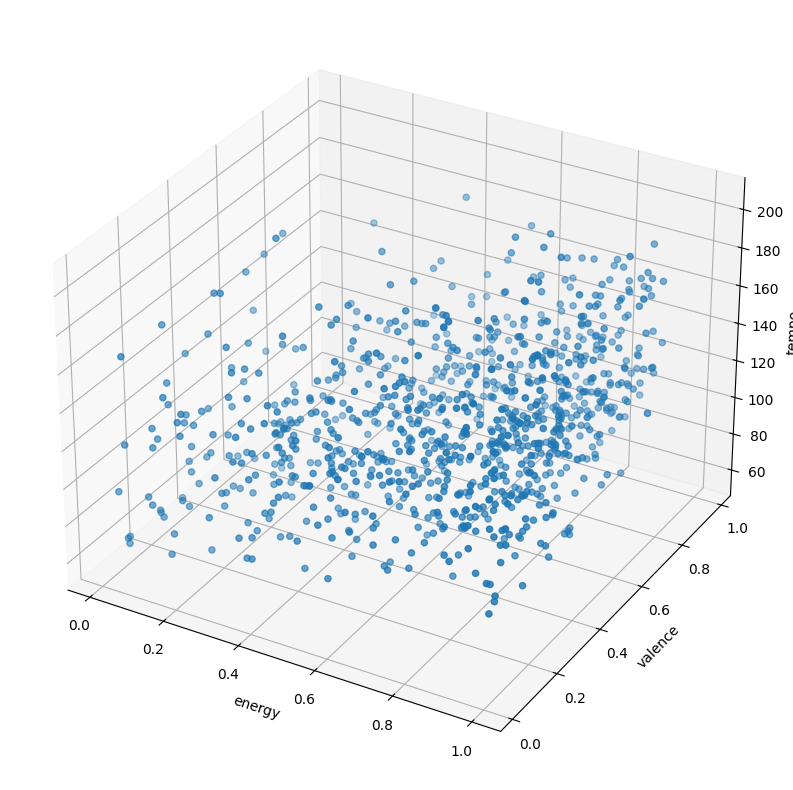

In [580]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(projection="3d")

ax.scatter(subset['energy'], subset['valence'], subset['tempo'])


ax.set_xlabel('energy')
ax.set_ylabel('valence')
ax.set_zlabel('tempo')

plt.show()

## Training und Test Split

In [581]:
from sklearn.model_selection import train_test_split
#TODO

## Normalizing the data (Min Max Norming)

In [582]:
from sklearn import preprocessing

norm_subset = subset

norm_subset = (norm_subset - norm_subset.min()) / (norm_subset.max() - norm_subset.min())
norm_subset.head(10)
X_train_norm = norm_subset


### Plot normalized Data

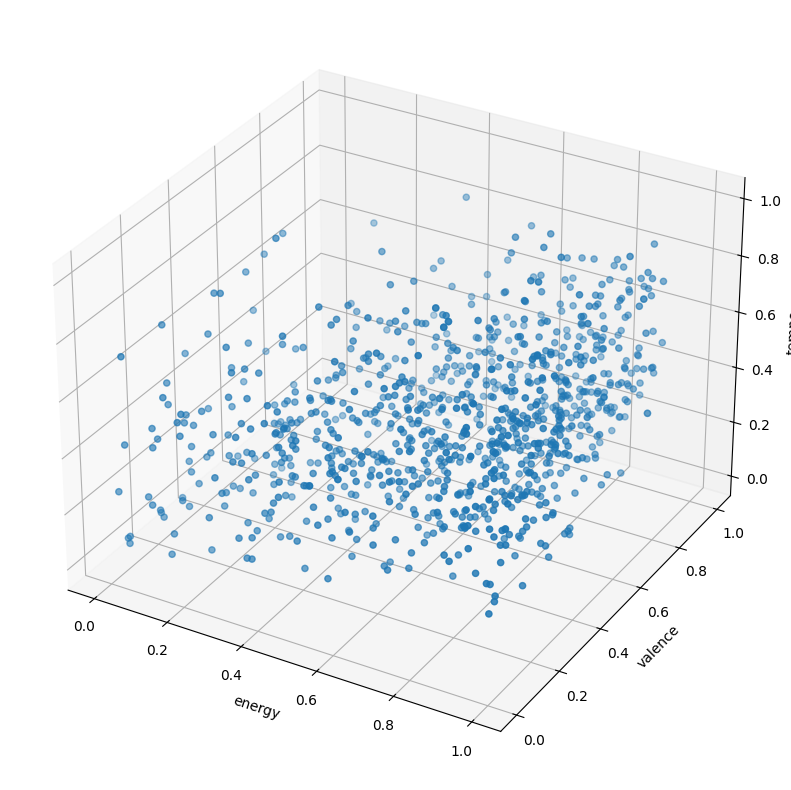

In [583]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(projection="3d")

ax.scatter(norm_subset['energy'], norm_subset['valence'], norm_subset['tempo'])

ax.set_xlabel('energy')
ax.set_ylabel('valence')
ax.set_zlabel('tempo')

plt.show()

## Fitting and evaluating the model

In [584]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 10, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=10, random_state=0)

## Visualize model

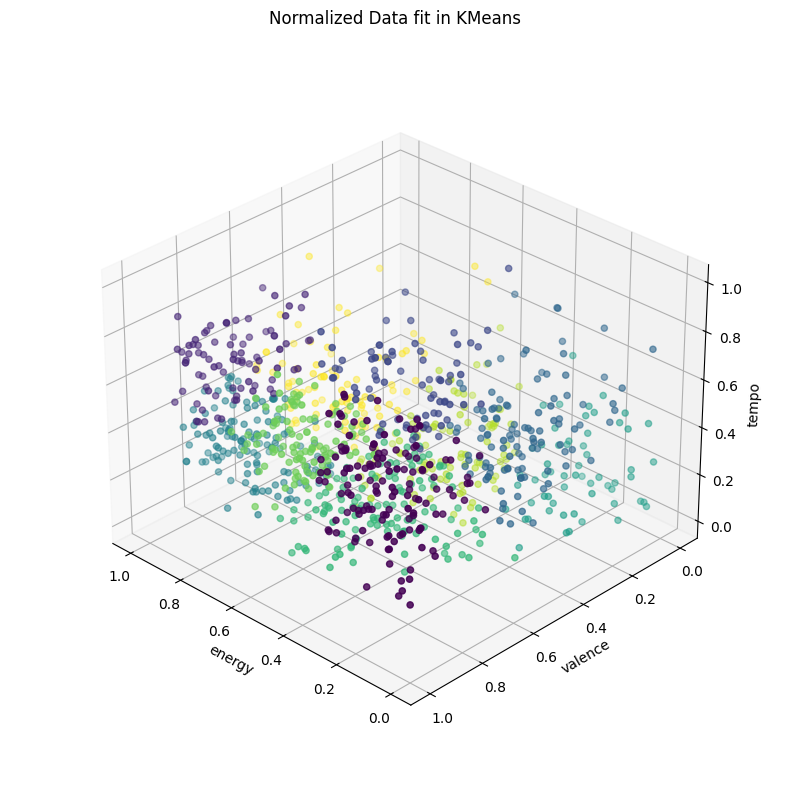

In [585]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(projection="3d",elev=30, azim=134)
labels = kmeans.labels_


ax.scatter(X_train_norm['valence'], X_train_norm['energy'], X_train_norm['tempo'] ,c=labels)

ax.set_xlabel("energy")
ax.set_ylabel("valence")
ax.set_zlabel("tempo")
ax.set_title("Normalized Data fit in KMeans")
ax.set_box_aspect(None, zoom=0.85)

plt.show()

# Questions

Is the clustering necessary? We could just plot/normalize the data and use K-Nearest Neighbour to generate the playlist. For Example with KNN with k = 10.

Is K-Nearest Neighbour necessary? We could just generate 100 Clusters for 1000 Songs so every Cluster contains 10 Songs and we would have a playlist.

# Nearest Neighbours

In [586]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

start_value = X_train_norm.sample(1)
print(start_value.to_numpy())
samples = X_train_norm

neigh = NearestNeighbors(n_neighbors=10)
neigh.fit(samples)
neighbour_indizes = neigh.kneighbors(start_value.to_numpy(), 10, return_distance=False)
#neigh.kneighbors([[0, 0, 1.3]], 2, return_distance=False)
#nbrs = neigh.radius_neighbors(
#   [[0, 0, 1.3]], 0.4, return_distance=False
#)

#np.asarray(nbrs[0][0])
    
print(neighbour_indizes)

[[0.95950187 0.80825344 0.52640549]]
[[741 368 178 764 740 744 373 510 221 251]]


c:\Users\Scheske\Documents\Private\Studium Ohm\Semester 7\Bionic Computing\BionicComputing\sklearn-env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


## Extract Songs via indizes

In [588]:
for index in neighbour_indizes:
    print(subset_with_id_and_name.iloc[index].track_name)

78587                                 Heit ruck ma aus
36497                                 Nains de jardins
25445     So ein schöner Tag (Fliegerlied) - Party Mix
100806                                Te Ví en un Tren
10117                                We Want Your Soul
78843                          Laudato Si - DJ Version
43385             Wait A Minute - Mattei & Omich Remix
14046                   Rudolph The Red-Nosed Reindeer
10539                      Translation 1: 12" Original
1231                                   Eu Vou no Gueto
Name: track_name, dtype: object
